# Clustering

**Author - Girish Shirke, Date - 28/03/2020**

### KMeans clustering 

*Online retail store wants to cluster the customers according to RFM(Recency, Frequency, Monitory Value) type marketing*

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('Online+Retail.csv',sep = ',',encoding = "ISO-8859-1", header= 0)

In [95]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [96]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [98]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [99]:
orderwise = data.dropna()

In [100]:
orderwise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**RFM analysis**

In RFM analysis, you look at the recency, frequency and the monetary scores of all the customers for segmentation.

    Recency: It measures how recently you visited the store or made a purchase
    Frequency: It measures the frequency of the transactions the customers made
    Monetary: It measures how much the customer spent on purchases he/she made

In [101]:
amount  = pd.DataFrame(orderwise.Quantity * orderwise.UnitPrice, columns = ["Amount"])

In [102]:
orderwise = pd.concat(objs = [orderwise, amount], axis = 1, ignore_index = False)

In [103]:
monetary = orderwise.groupby('CustomerID').Amount.sum() 

In [104]:
monetary = monetary.reset_index()
monetary.head()
#This is the M dataframe from RFM analysis

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [105]:
f = orderwise.groupby('CustomerID').InvoiceDate.count()

In [106]:
f = f.reset_index()
f.head()
#This is the F dataframe from RFM analysis

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [107]:
master = monetary.merge(f, on='CustomerID', how='inner')

In [108]:
master.head()

,CustomerID,Amount,InvoiceDate
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [109]:
recency = orderwise[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [110]:
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]

In [111]:
RFM = f.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")
RFM.head()

,CustomerID,InvoiceDate,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


In [112]:
RFM = RFM.rename(columns={"InvoiceDate":"Frequency","Amount":"Monetary"})

In [114]:
print(RFM.shape)
RFM.head(5)

(4372, 4)


,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


*Removing Outliers: One way to do it is by eliminating all the data points which fall outside the 1.5 times the IQR of the 1st and the 3rd quartile.*

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18a505e400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18a5052748>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18a505e7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f18a5052c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f18b2e67860>],
 'means': []}

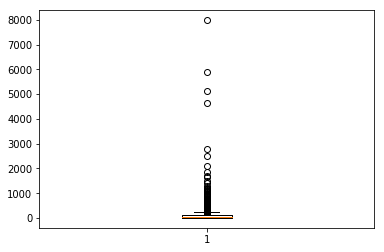

In [115]:
plt.boxplot(RFM.Frequency)

In [116]:
Q1 = RFM.Monetary.quantile(0.25)
Q3 = RFM.Monetary.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Monetary >= Q1 - 1.5*IQR) & (RFM.Monetary <= Q3 + 1.5*IQR)]


1318.3624999999993


In [117]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]


65.0


In [118]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]


147 days 01:01:00


In [119]:
print(RFM.shape)
RFM.head(5)

(3697, 4)


,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


In [121]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days



,Frequency,Monetary,Recency
0,2,0.000000e+00,326
2,31,1.797240e+03,75
3,73,1.757550e+03,19
4,17,3.344000e+02,310
5,95,1.545410e+03,36
6,4,8.900000e+01,204
7,58,1.079400e+03,232
8,13,4.594000e+02,214
9,59,2.811430e+03,23
11,19,1.168060e+03,2


In [123]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [124]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
*This statistics tell that is clustering possible for given problem solution*

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [125]:
#Cell credits - UpGrad Education
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [126]:
hopkins(RFM_norm1)

0.8976976303799917

## K-Means with random value of K

In [128]:
model_5 = KMeans(n_clusters=5,max_iter=50)
model_5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [129]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

In [134]:
plot = pd.DataFrame(sse_)

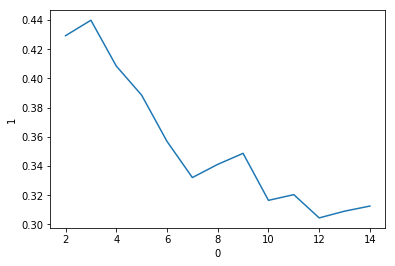

In [135]:
sns.lineplot(x=plot[0],y=plot[1])

### Sum of squared distance

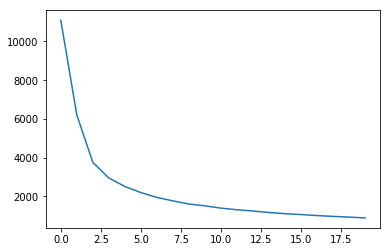

In [136]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)